**Dataset Description**

**Person ID**: An identifier for each individual.

**Gender**: The gender of the person (Male/Female).

**Age**: The age of the person in years.

**Occupation**: The occupation or profession of the person.

**Sleep Duration** (hours): The number of hours the person sleeps per day.

**Quality of Sleep** (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

**Physical Activity Level** (minutes/day): The number of minutes the person engages in physical activity daily.

**Stress Level** (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).

**Blood Pressure** (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

**Heart Rate** (bpm): The resting heart rate of the person in beats per minute.

**Daily Steps**: The number of steps the person takes per day.

**Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [31]:
import pandas as pd

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
print(df)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [32]:
#Finding the Null values in the Dataset to handle missing data
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

It shows that the dataset contains no missing feature for the feature variables.

In the column **Sleep Disorder**, the Nan values indicate that the individual has no sleeping disorder and does not represent missing values.

As such, this classifies as another category by itself, hence we will be transforming the Nan values of this column to a category named "No Disorder"

In [33]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

We also need to split the "**Blood Pressure**" column, which currently holds High BP/Low BP, into two different columns for analysis.

Along with this, we can drop "**Person ID**" column as it makes no contribution for the analysis.

In [34]:
df[['BP High', 'BP Low']] = df['Blood Pressure'].str.split('/', expand=True)
df.drop('Blood Pressure', axis=1, inplace=True)
df['BP High'] = df['BP High'].astype(int)
df['BP Low'] = df['BP Low'].astype(int)
df.drop('Person ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP High,BP Low
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [39]:
import numpy as np
import matplotlib.pyplot as plt
continuous_variables = ["Age", "Sleep Duration", "Physical Activity Level", "Heart Rate", "Daily Steps", "BP High", "BP Low"]
df_continuous = df[continuous_variables]
print(df_continuous.describe())

              Age  Sleep Duration  Physical Activity Level  Heart Rate  \
count  374.000000      374.000000               374.000000  374.000000   
mean    42.184492        7.132086                59.171123   70.165775   
std      8.673133        0.795657                20.830804    4.135676   
min     27.000000        5.800000                30.000000   65.000000   
25%     35.250000        6.400000                45.000000   68.000000   
50%     43.000000        7.200000                60.000000   70.000000   
75%     50.000000        7.800000                75.000000   72.000000   
max     59.000000        8.500000                90.000000   86.000000   

        Daily Steps     BP High      BP Low  
count    374.000000  374.000000  374.000000  
mean    6816.844920  128.553476   84.649733  
std     1617.915679    7.748118    6.161611  
min     3000.000000  115.000000   75.000000  
25%     5600.000000  125.000000   80.000000  
50%     7000.000000  130.000000   85.000000  
75%     800

The summary statistics on the continuous attributes of the dataframe indicates the following points:



*   The Dataset has a mean Age of 42, this is the typical age group where heart diseases are surprising
*   The AGE range is between 27 and 59 which is a good distribution to analyze early heart disease prevention
*   The Dataset doesn't have too many outliers and has a good range of data points for each variable


In the below code, similar analysis is done for categorical data





In [40]:
categorical_variables = ["Gender", "Occupation", "Quality of Sleep", "Stress Level", "BMI Category", "Sleep Disorder"]
for col in df[categorical_variables]:
    print(df[col].value_counts(), "\n")

Gender
Male      189
Female    185
Name: count, dtype: int64 

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64 

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64 

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64 

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64 

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64 



The above code shows the count of each category present in the dataset for it's respective variable.

Plotting the Dataset

<Figure size 1000x800 with 0 Axes>

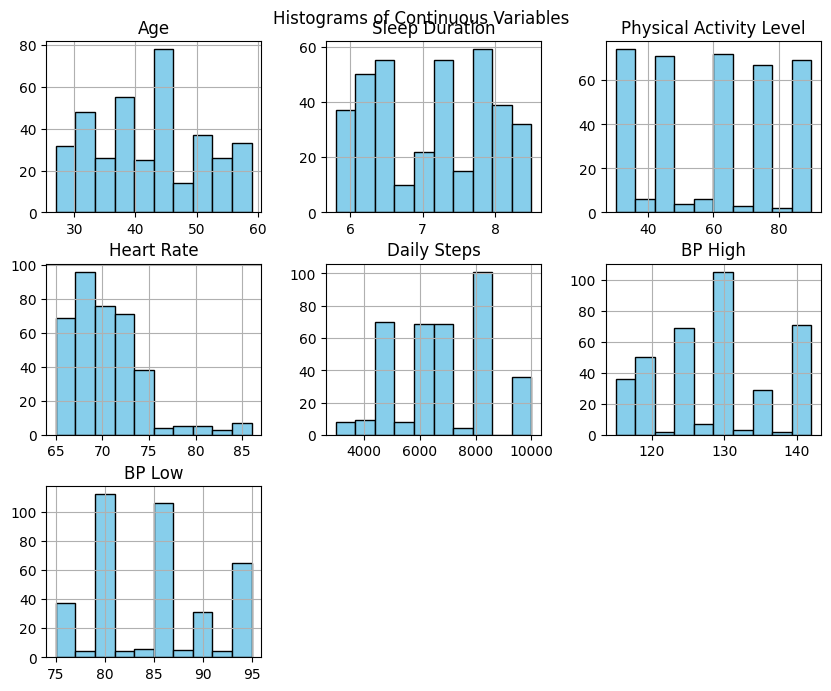

In [41]:
continuous_variables = ["Age", "Sleep Duration", "Physical Activity Level", "Heart Rate", "Daily Steps", "BP High", "BP Low"]

plt.figure(figsize=(10, 8))  # Set figure size

df[continuous_variables].hist(bins=10, color='skyblue', edgecolor='black', figsize=(10, 8))
plt.suptitle('Histograms of Continuous Variables', x=0.5, y=0.92)
plt.show()

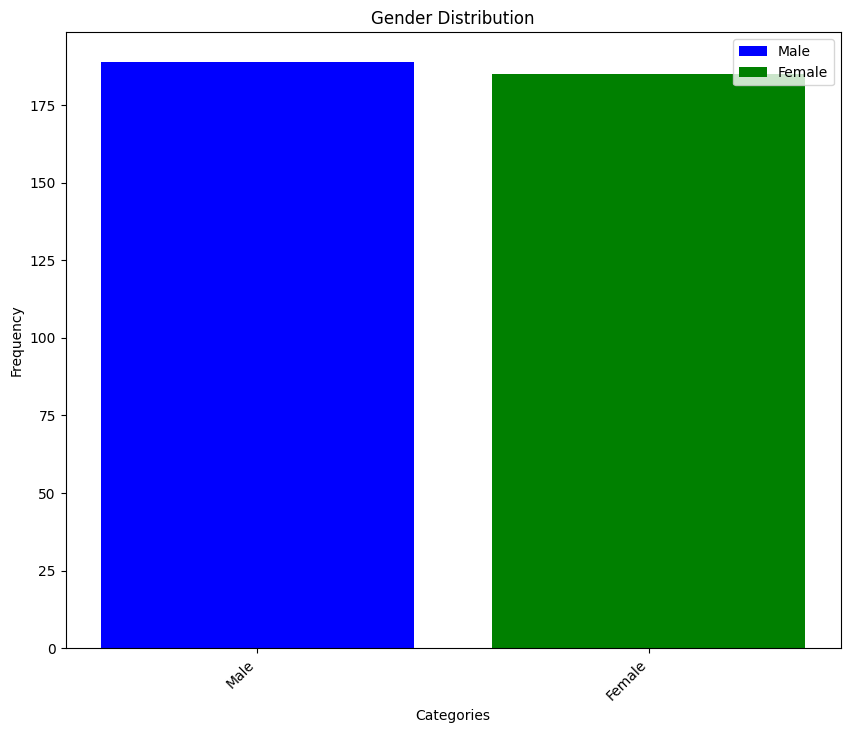

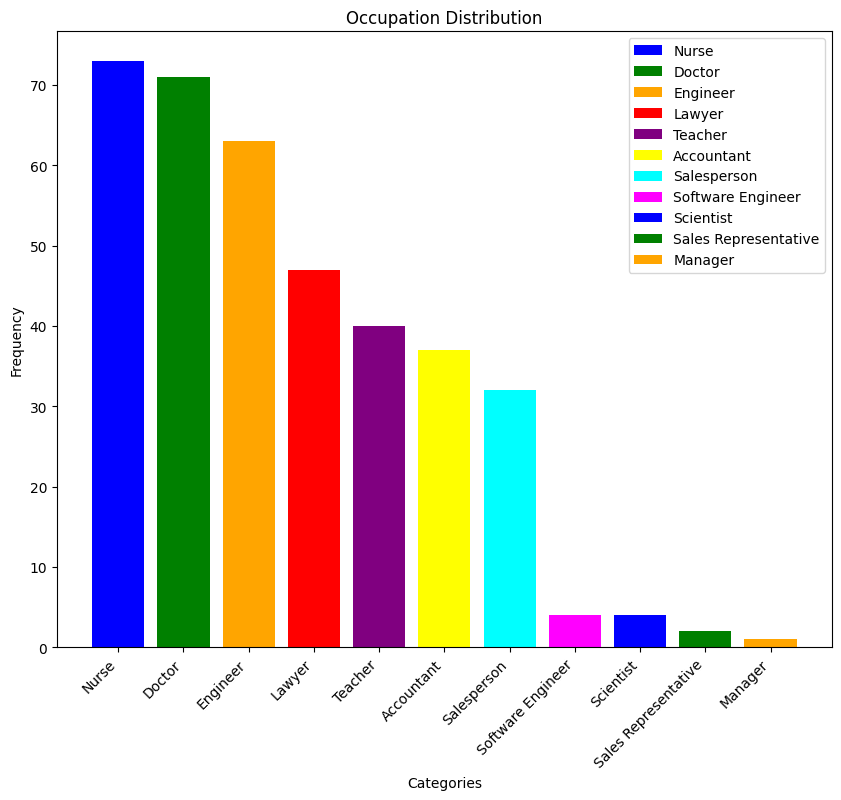

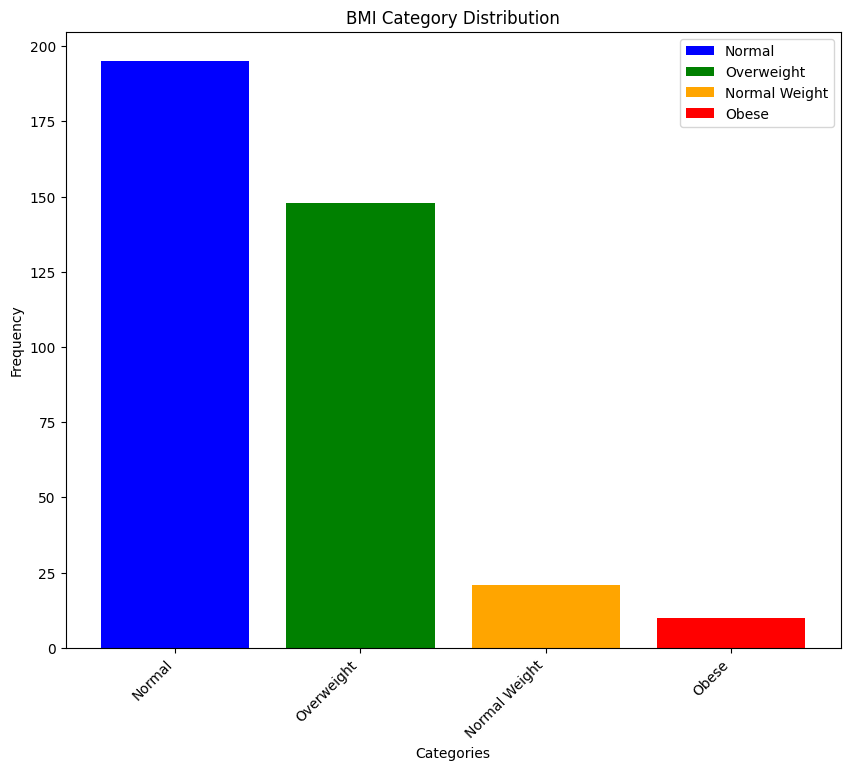

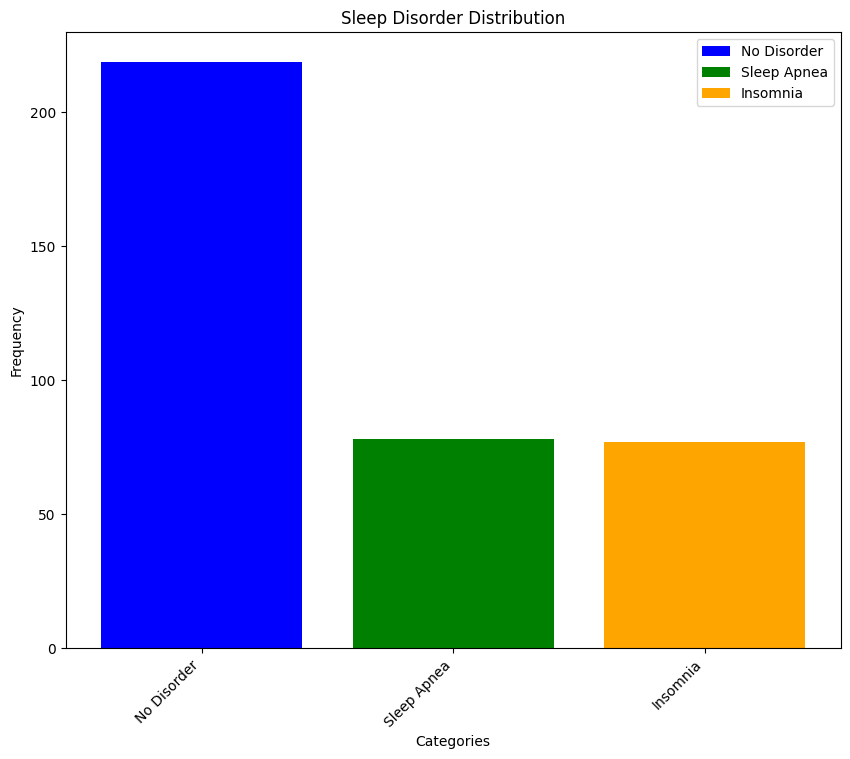

In [42]:
colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow', 'cyan', 'magenta']

categorical_variables_for_plot = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]

for col in categorical_variables_for_plot:

    value_counts = df[col].value_counts()

    plt.figure(figsize=(10, 8))
    bars = plt.bar(value_counts.index, value_counts, color=colors[:len(value_counts)])
    plt.xticks(rotation=45, ha='right')

    plt.legend(bars, value_counts.index, loc='upper right')

    plt.title(col + ' Distribution')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')

    plt.show()

**Relation Between Feature Variables and Stress level**

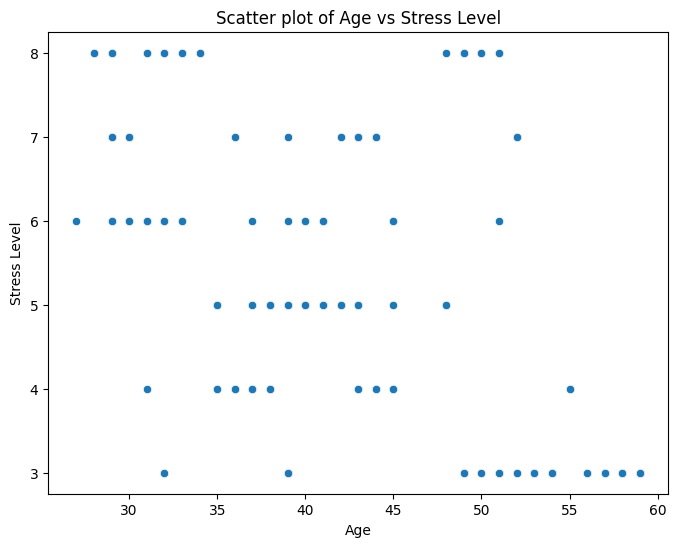

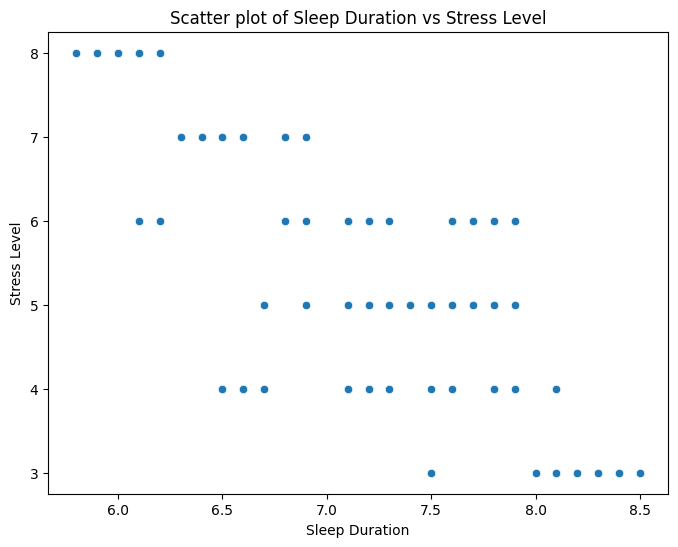

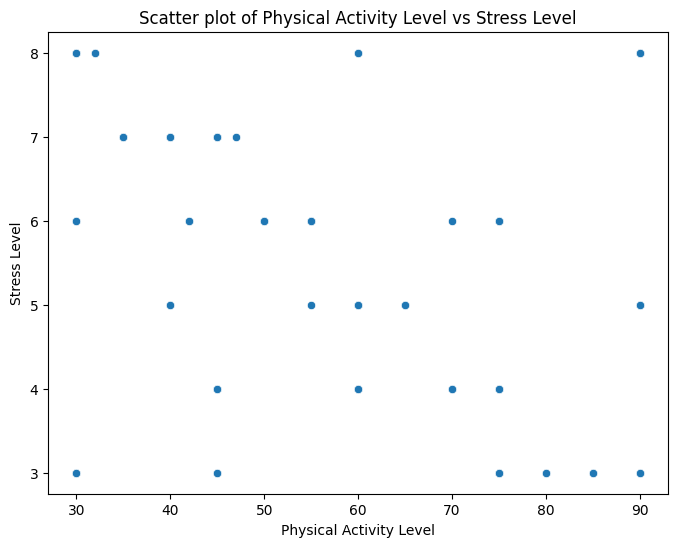

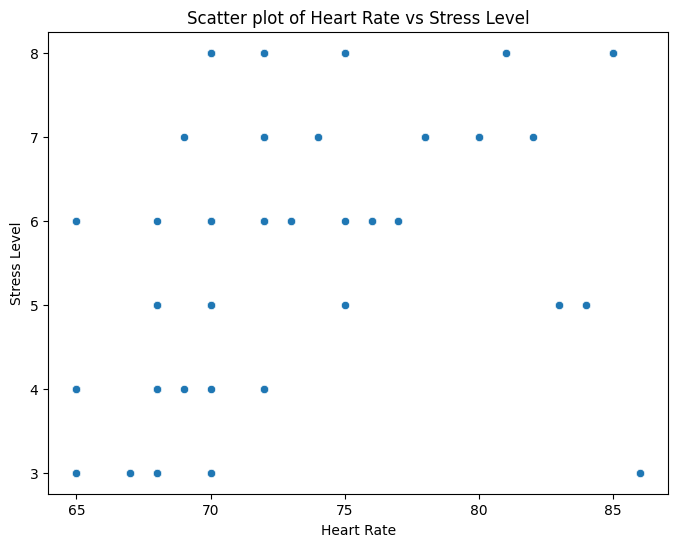

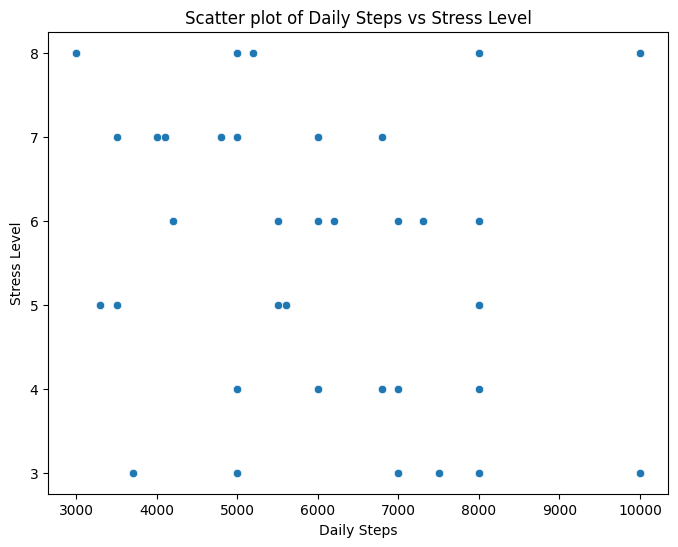

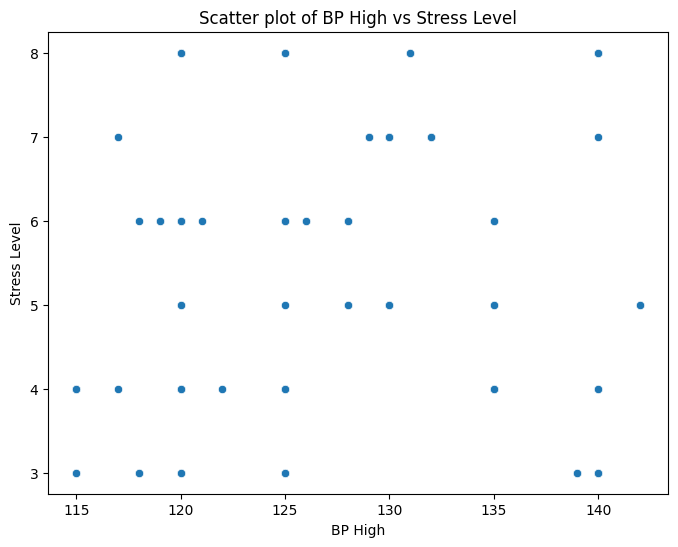

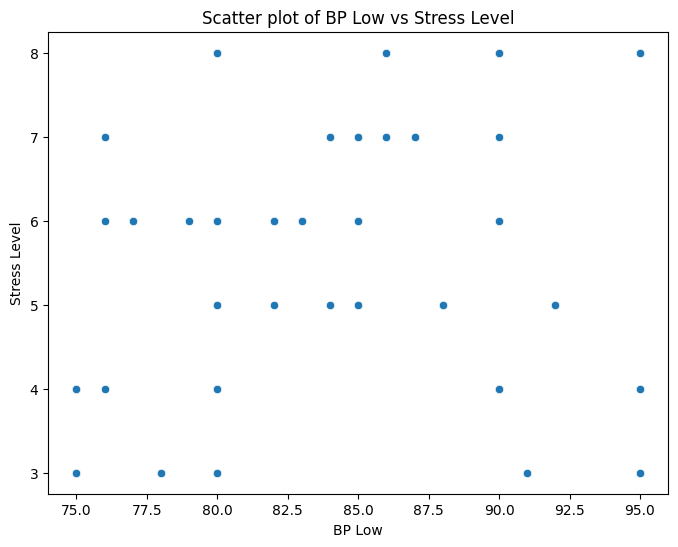

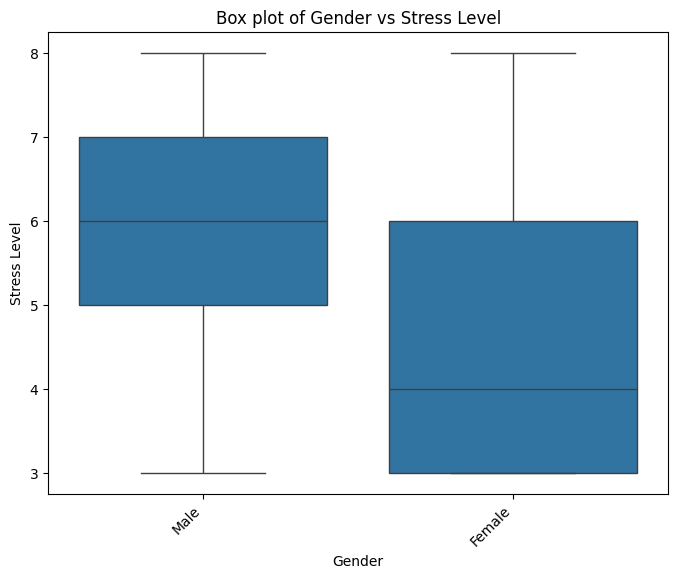

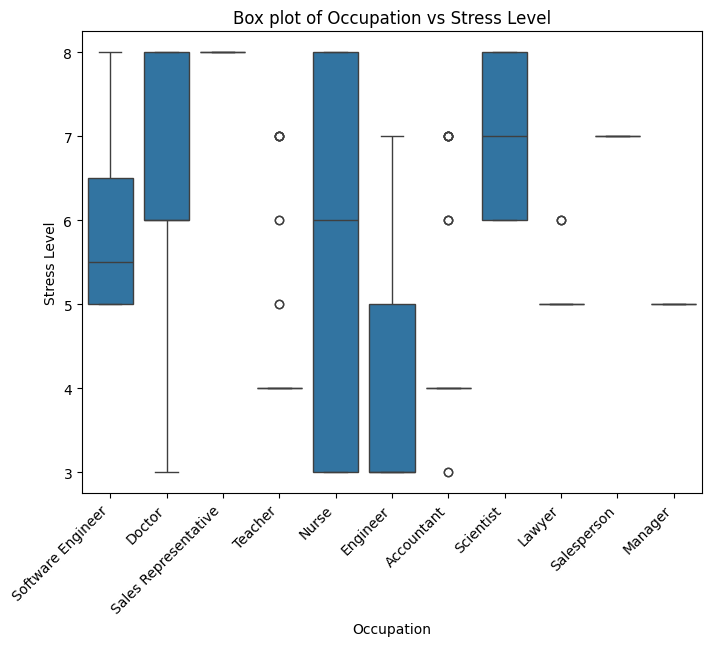

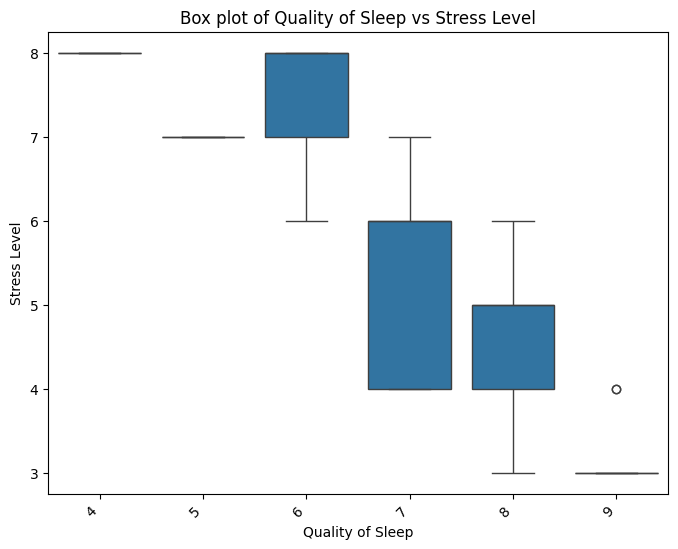

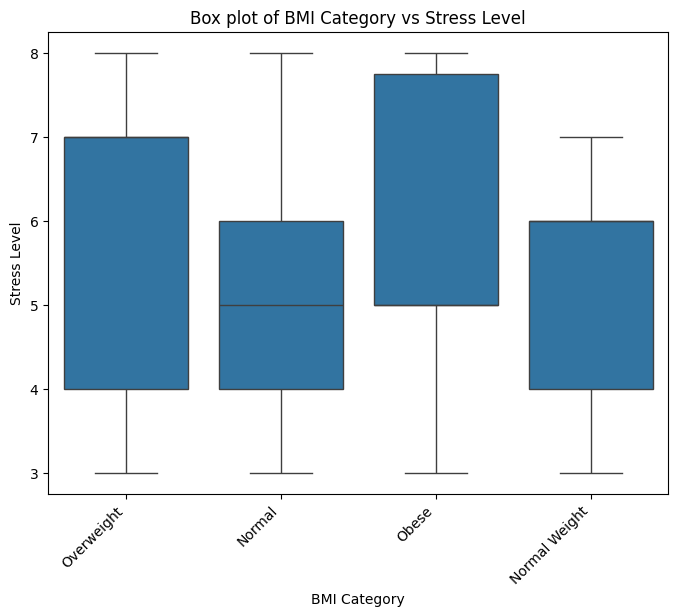

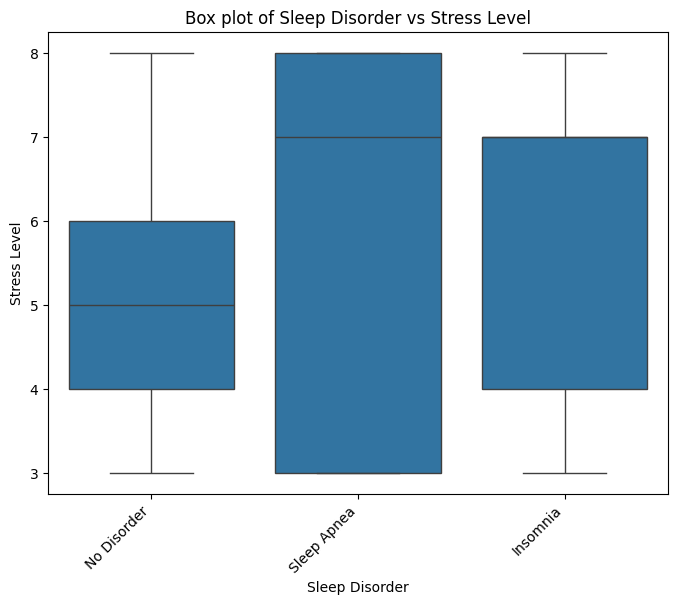

In [47]:
for col in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Stress Level', data=df)
    plt.title(f'Scatter plot of {col} vs Stress Level')
    plt.xlabel(col)
    plt.ylabel('Stress Level')
    plt.show()

categorical_variables = ["Gender", "Occupation", "Quality of Sleep", "BMI Category", "Sleep Disorder"]
for col in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='Stress Level', data=df)
    plt.title(f'Box plot of {col} vs Stress Level')
    plt.xlabel(col)
    plt.ylabel('Stress Level')
    plt.xticks(rotation=45, ha='right')
    plt.show()

**Analysis of the above correlation graphs**

*   Sleep Duration and stress level --> Good relation

*   Quality of sleep to stress level --> high correlation
*   Physical Activity vs Stress Level --> Decent correlation


*   Variables such as Daily Steps/Heart Rate/BP High/BP low shows no good correlation with stress level


**Demographic Analysis**

**Age:** Shows no correlation with stress level

**BMI Category:** People categorised as Obese generally had higher stress level.

**Sleep Disorder:** Doesn't show any direct correlation with stress level

**Gender**: It is shown that Male candidates has higher levels of stress compared to female

**Occupation:** Doctors, Scientists, Sales Representatives and Salesperson(the data points are low for Sales Rep and Salespersons hence could be outliers) all showed higher levels of stress.



